In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("perrin-freres-monthly-champagne-.csv")
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
data.drop(105,axis=0,inplace=True)
data.drop(106,axis=0,inplace=True)

In [7]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


As the columns name doesn't look good we are changing the column name to "Sales"

In [8]:
data.columns=["Month","Sales"]
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [9]:
data.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
data['Month']=pd.to_datetime(data['Month'])

In [11]:
data.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
data.set_index('Month',inplace=True)
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [13]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

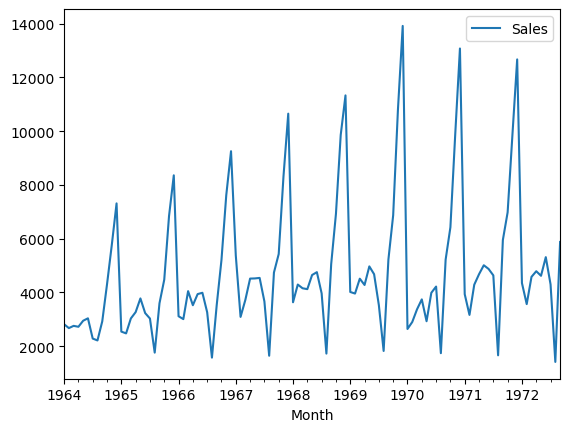

In [14]:
data.plot()

The below piece of code is to perform Augmented dickey-fuller test(adfuller) the following test is a statistical test that is used to find out whether the given time-series data is stationary or not

So here we consider 2 hypothesis that is

$$H_0:\text{Time series data is not stationary (This is null hypothesis)}$$
$$H_1:\text{Time series data is stationary     (This is alternate hypothesis)}$$


In [15]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['Sales'])
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print("Time series data is stationary")
    else:
        print("Time series data is not stationary")
         

In [16]:
adfuller_test(data['Sales'])

ADF Test Statistic : -1.833593056327616
p-value : 0.3639157716602485
#Lags Used : 11
Number of Observations Used : 93
Time series data is not stationary


In [17]:
data['Sales first difference']=data['Sales']-data['Sales'].shift(1)

In [18]:
data.head()

,Sales,Sales first difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [19]:
data['Seasonal first difference']=data['Sales']-data['Sales'].shift(12)

In [20]:
data.head(16)

,Sales,Sales first difference,Seasonal first difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [21]:
adfuller_test(data['Seasonal first difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
Time series data is stationary


<Axes: xlabel='Month'>

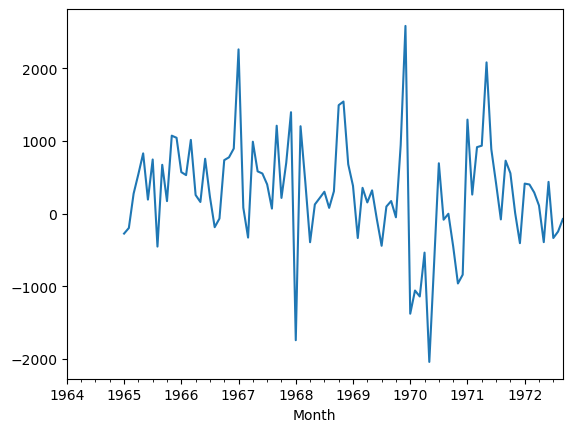

In [22]:
data['Seasonal first difference'].plot()

IF U CONSIDER THE AUTOREGRESSIVE MODEL (AR) EQUATION WE CAN ONLY WE DON'T KNOW UPTO WHICH TIME LAG WE NEED TO CONSIDER THE DATA SO THAT THE FORECASTING WILL BE GOOD.SO IN ORDER TO FIND OUT WE USE THE AUTOCORRELATION PLOT

SO NOW WE WILL BE USING AUTOCORRELATION PLOT AND CORRELATION PLOT

# Below piece of code to find the seasonal order of the data 

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

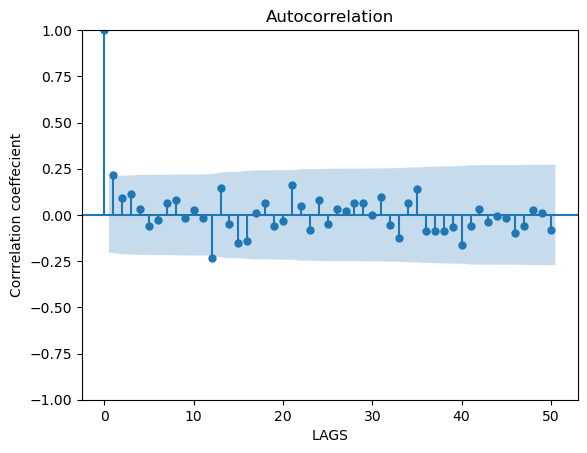

In [24]:
fig1=plot_acf(data['Seasonal first difference'].dropna(),lags=50)
plt.xlabel("LAGS")
plt.ylabel("Corrrelation coeffecient")
plt.show(fig1)

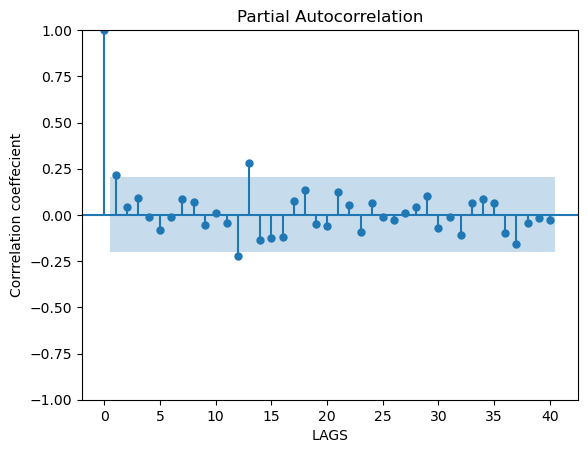

In [25]:
fig2=plot_pacf(data['Seasonal first difference'].dropna(),lags=40)
plt.xlabel("LAGS")
plt.ylabel("Corrrelation coeffecient")
plt.show(fig2)

# Below code we apply to pacf and acf to find non-seasonal order

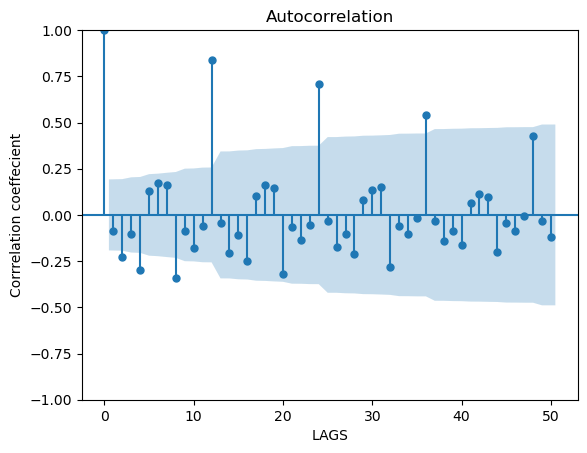

In [26]:
fig1=plot_acf(data['Sales first difference'].dropna(),lags=50)
plt.xlabel("LAGS")
plt.ylabel("Corrrelation coeffecient")
plt.show(fig1)

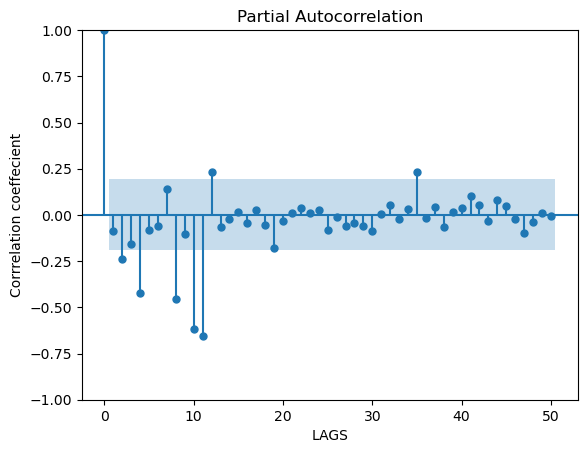

In [27]:
fig1=plot_pacf(data['Sales first difference'].dropna(),lags=50)
plt.xlabel("LAGS")
plt.ylabel("Corrrelation coeffecient")
plt.show(fig1)

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
model=ARIMA(data['Sales'],order=(11,1,37))
model_fit=model.fit()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/homebrew/anaconda3/lib/python3.11/site-pac

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:               ARIMA(11, 1, 37)   Log Likelihood                -914.132
Date:                Tue, 02 Jul 2024   AIC                           1926.264
Time:                        12:17:18   BIC                           2055.839
Sample:                    01-01-1964   HQIC                          1978.759
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7393     27.148     -0.027      0.978     -53.949      52.470
ar.L2         -0.7727      8.198     -0.094      0.925     -16.840      15.295
ar.L3         -0.6926     22.265     -0.031      0.975     -44.330      42.945
ar.L4         -0.9326      3.135     -0.298      0.766      -7.076       5.211
ar.L5         -0.7266     25.945     -0.028      0.978     -51.577      50.124
ar.L6         -0.7310      9.334     -0.078      0.938     -19.026      17.564
ar.L7         -0.6471     21.702     -0.030      0.976     -43.182      41.888
ar.L8         -0.8533      3.011     -0.283      0.777      -6.756       5.049
ar.L9         -0.6767     23.561     -0.029      0.977     -46.856      45.503
ar.L10        -0.6839      7.266     -0.094      0.925     -14.924      13.557
ar.L11        -0.5880     19.365     -0.030      0.976     -38.543      37.367
ma.L1          0.1035     27.046      0.004      0.997     -52.905      53.112
ma.L2          0.0398     18.927      0.002      0.998     -37.056      37.136
ma.L3          0.0892     17.653      0.005      0.996     -34.509      34.688
ma.L4          0.2455     12.208      0.020      0.984     -23.681      24.172
ma.L5         -0.0209     17.795     -0.001      0.999     -34.898      34.856
ma.L6         -0.0266     13.932     -0.002      0.998     -27.332      27.279
ma.L7          0.1080     14.206      0.008      0.994     -27.735      27.951
ma.L8          0.1544      7.959      0.019      0.985     -15.446      15.754
ma.L9         -0.0114     11.448     -0.001      0.999     -22.450      22.427
ma.L10        -0.0223      8.763     -0.003      0.998     -17.198      17.153
ma.L11         0.0690      8.829      0.008      0.994     -17.236      17.374
ma.L12         0.0236      5.452      0.004      0.997     -10.662      10.709
ma.L13         0.0594      6.570      0.009      0.993     -12.817      12.936
ma.L14        -0.0264      3.889     -0.007      0.995      -7.648       7.595
ma.L15         0.0223      4.656      0.005      0.996      -9.103       9.148
ma.L16         0.0882      3.796      0.023      0.981      -7.351       7.528
ma.L17        -0.0230      6.521     -0.004      0.997     -12.804      12.758
ma.L18        -0.0149      5.150     -0.003      0.998     -10.108      10.078
ma.L19         0.0019      6.869      0.000      1.000     -13.461      13.465
ma.L20         0.0286      3.929      0.007      0.994      -7.673       7.730
ma.L21        -0.0024      5.016     -0.000      1.000      -9.834       9.829
ma.L22        -0.0168      3.726     -0.004      0.996      -7.320       7.287
ma.L23        -0.0230      3.999     -0.006      0.995      -7.860       7.814
ma.L24         0.1068      3.270      0.033      0.974      -6.302       6.515
ma.L25         0.0298      5.272      0.006      0.995     -10.303      10.362
ma.L26        -0.0080      3.541     -0.002      0.998      -6.949       6.933
ma.L27        -0.0098      4.236     -0.002      0.998      -8.312       8.293
ma

In [31]:
data['forecast']=model_fit.predict(start=60,end=93,dynamic=True)

<Axes: xlabel='Month'>

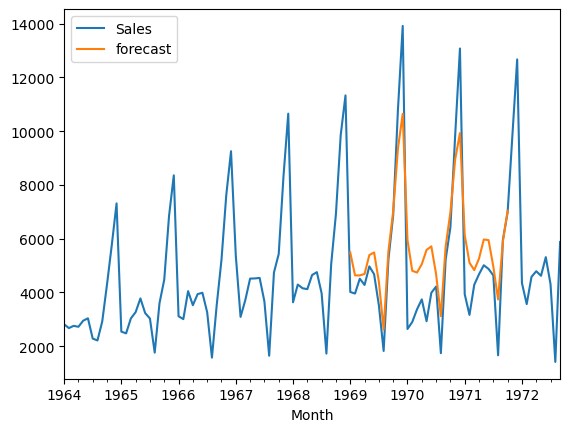

In [32]:
data[['Sales','forecast']].plot()

The prediction here if you look is completely wrong as we have tried to fit an arima model for the data that has seasonality

In [33]:
pip install --upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.


In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
model=SARIMAX(data['Sales'],order=(11,1,1),seasonal_order=(11,1,12,12))
sarimax_model=model.fit()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           36     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12938D+00    |proj g|=  1.68844D-01


 This problem is unconstrained.



At iterate    5    f=  6.97692D+00    |proj g|=  3.73648D-02

At iterate   10    f=  6.97107D+00    |proj g|=  2.74328D-02

At iterate   15    f=  6.96562D+00    |proj g|=  5.85443D-03

At iterate   20    f=  6.96549D+00    |proj g|=  3.62755D-03

At iterate   25    f=  6.96544D+00    |proj g|=  1.47027D-03

At iterate   30    f=  6.96542D+00    |proj g|=  4.78128D-04

At iterate   35    f=  6.96538D+00    |proj g|=  1.26678D-03

At iterate   40    f=  6.96536D+00    |proj g|=  2.49561D-03

At iterate   45    f=  6.96533D+00    |proj g|=  5.79614D-04


/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.96531D+00    |proj g|=  1.24504D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   36     50     54      1     0     0   1.245D-03   6.965D+00
  F =   6.9653087001213958     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [36]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                         SARIMAX Results                                                          
==================================================================================================================================
Dep. Variable:                                                                      Sales   No. Observations:                  105
Model:             SARIMAX(11, 1, 1)x(11, 1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 12)   Log Likelihood                -731.357
Date:                                                                    Tue, 02 Jul 2024   AIC                           1534.715
Time:                                                                            12:23:01   BIC                           1625.499
Sample:                                                                        01-01-1964   HQIC                          1571.356
                                                                             - 09-01-1972                                         
Covariance Type:                                                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5214      1.563     -0.334      0.739      -3.584       2.541
ar.L2         -0.5753      0.890     -0.646      0.518      -2.320       1.169
ar.L3         -0.5445      1.024     -0.532      0.595      -2.551       1.462
ar.L4         -0.5817      0.829     -0.702      0.483      -2.207       1.043
ar.L5         -0.5346      0.932     -0.573      0.566      -2.362       1.293
ar.L6         -0.5163      0.868     -0.595      0.552      -2.218       1.185
ar.L7         -0.4569      0.992     -0.461      0.645      -2.400       1.487
ar.L8         -0.4725      0.930     -0.508      0.611      -2.295       1.350
ar.L9         -0.4173      0.934     -0.447      0.655      -2.247       1.413
ar.L10        -0.3758      0.822     -0.457      0.648      -1.987       1.235
ar.L11        -0.3593      0.858     -0.419      0.675      -2.041       1.322
ma.L1         -0.0618      1.554     -0.040      0.968      -3.107       2.984
ar.S.L12      -0.2772   1.84e+05   -1.5e-06      1.000   -3.61e+05    3.61e+05
ar.S.L24       0.0048   1.11e+05   4.38e-08      1.000   -2.17e+05    2.17e+05
ar.S.L36       0.1057   7.96e+04   1.33e-06      1.000   -1.56e+05    1.56e+05
ar.S.L48       0.1928   9.65e+04      2e-06      1.000   -1.89e+05    1.89e+05
ar.S.L60       0.2346   1.45e+05   1.61e-06      1.000   -2.85e+05    2.85e+05
ar.S.L72      -0.0481   5.61e+04  -8.57e-07      1.000    -1.1e+05     1.1e+05
ar.S.L84      -0.2454   1.06e+05  -2.32e-06      1.000   -2.08e+05    2.08e+05
ar.S.L96      -0.0299   6.23e+04  -4.79e-07      1.000   -1.22e+05    1.22e+05
ar.S.L108     -0.0216   5.83e+04  -3.71e-07      1.000   -1.14e+05    1.14e+05
ar.S.L120      0.0473   1.02e+05   4.62e-07      1.000   -2.01e+05    2.01e+05
ar.S.L132     -0.0069   8.06e+04  -8.56e-08      1.000   -1.58e+05    1.58e+05
ma.S.L12      -0.3588   1.84e+05  -1.95e-06      1.000   -3.61e+05    3.61e+05
ma.S.L24       0.0878   1.51e+05   5.83e-07      1.000   -2.95e+05    2.95e+05
ma.S.L36      -0.0300   1.16e+05  -2.58e-07      1.000   -2.28e+05    2.28e+05
ma.S.L48       0.0356   1.17e+05   3.05e-07      1.000   -2.28e+05    2.28e+05
ma.S.L60       0.1219   1.57e+05   7.75e-07      1.000   -3.08e+05    3.08e+05
ma.S.L72      -0.0515   1.47e+05  -3.51e-07      1.000   -2.88e+05    2.88e+05
ma.S.L84       0.1352   1.52e+05   8.88e-07      1.000   -2.98e+05    2.98e+05
ma.S.L96      -0.0422   1.51e+05  -2.78e-07      1.000   -2.97e+05    2.97e+05
ma.S.L108      0.0586   1.12e+05   5.23e-07      1.000    -2.2e+05     2.2e+05
ma.S.L12

In [37]:
data['forecast']=sarimax_model.predict(start=60,end=93,dynamic=True)

<Axes: xlabel='Month'>

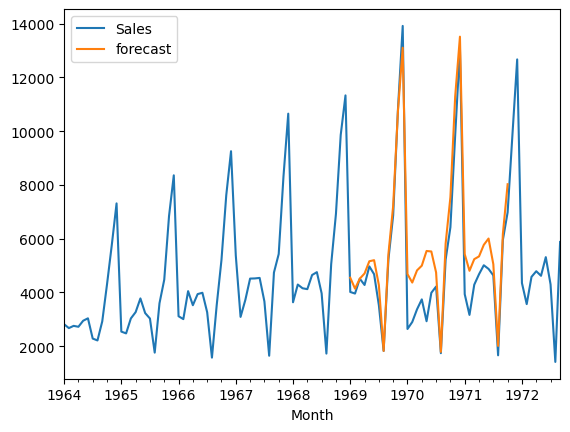

In [38]:
data[['Sales','forecast']].plot()

In [39]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+DateOffset(months=x)for x in range(0,48)]


In [40]:
future_dataset_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [41]:
future_dataset_data.tail()

,Sales,Sales first difference,Seasonal first difference,forecast
1976-04-01,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN


In [42]:
future_data=pd.concat([data,future_dataset_data])

<Axes: >

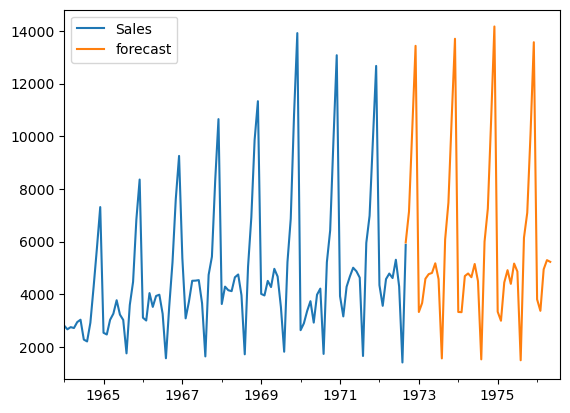

In [43]:
future_data['forecast']=sarimax_model.predict(start=104,end=148,dynamic=True)
future_data[['Sales','forecast']].plot()